<center><h1>MODELO DE MARKOV</h1></center>

<H1>Autor: Felipe Fernández Rodriguez</H1>

<p>
Este notebook desarrolla una simulación basada en un modelo epidemiológico básico para una enfermedad infecciosa, utilizando como herramienta principal una cadena de Markov. El propósito de esta simulación es comprender cómo evoluciona la población afectada por una enfermedad cuando se establecen probabilidades de transición entre distintos estados clínicos, tales como estar sano, presentar síntomas leves, presentar síntomas graves, recuperarse o fallecer.

La simulación parte de una población inicial de 1.000.000 de habitantes, todos sanos en el día 0, y a través de una matriz de transición se modela cómo los individuos van cambiando de estado diariamente según ciertas probabilidades definidas. Este enfoque permite observar de manera sencilla y visual cómo una enfermedad puede propagarse, agravarse y eventualmente controlarse en un escenario teórico.

El objetivo central es entender el comportamiento dinámico de la enfermedad bajo un conjunto de reglas simples, mostrando cómo un modelo matemático puede servir para analizar fenómenos reales. Aunque este modelo es una simplificación de lo que ocurre en situaciones epidemiológicas complejas, resulta muy útil para:

<ul>
    <li>
        Ilustrar el funcionamiento de las cadenas de Markov
    </li>
    <li>
        Comprender la influencia de las probabilidades de transición
    </li>
    <li>
        Visualizar la evolución de la enfermedad en el tiempo
    </li>
    <li>
        Explorar escenarios hipotéticos sin necesidad de datos reales
    </li>
    <li>
        Reforzar el aprendizaje sobre simulación y modelación computacional
    </li>
</ul>

Este notebook integra teoría y práctica, combinando una breve descripción del modelo, su formulación matemática, su implementación en Python y la representación gráfica de los resultados. De esta forma, el lector podrá entender claramente el razonamiento detrás del código y el propósito de la simulación en un contexto epidemiológico simplificado.
</p>

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros que recibe la función: Número de días a simular.
# Retorna vector columna con la cantidad final de personas en cada estado después de la simulación:
# [sanos, leves, graves, recuperados, fallecidos]
def vector_poblacion(dias):

    # ----------------------------------------------------
    # Probabilidades de transición entre estados
    # ----------------------------------------------------
    sl = 0.20   # Probabilidad de pasar de sano → leve
    lg = 0.15   # Probabilidad de leve → grave
    lr = 0.25   # Probabilidad de leve → recuperado
    gr = 0.15   # Probabilidad de grave → recuperado
    gf = 0.15   # Probabilidad de grave → fallecido

    # ----------------------------------------------------
    # Vector poblacional inicial (día 0)
    # [sanos, leves, graves, recuperados, fallecidos]
    # ----------------------------------------------------
    x = np.array([
        [1_000_000],  # Población sana inicial
        [0],  # Leves 
        [0],  # Graves
        [0],  # Recuperados
        [0]   # Fallecidos
    ])

    # ----------------------------------------------------
    # Matriz de transición A que define cómo evoluciona
    # la población de un día al siguiente.
    # Cada fila corresponde al estado del día n+1
    # ----------------------------------------------------
    A = np.array([
        [1 - sl,       0,               0,    0, 0],  # Sanos
        [sl,           1 - lr - lg,     0,    0, 0],  # Leves
        [0,            lg,    1 - gr - gf,    0, 0],  # Graves
        [0,            lr,             gr,    1, 0],  # Recuperados
        [0,            0,              gf,    0, 1]   # Fallecidos
    ])

    # Listas para almacenar la evolución diaria
    sanos, leves, graves, recuperados, fallecidos = [], [], [], [], []

    # Guardar valores iniciales (día 0)
    sanos.append(x[0, 0])
    leves.append(x[1, 0])
    graves.append(x[2, 0])
    recuperados.append(x[3, 0])
    fallecidos.append(x[4, 0])

    # ----------------------------------------------------
    # Simulación por N días
    # Cada iteración aplica: X(n+1) = A * X(n)
    # ----------------------------------------------------
    for _ in range(dias):
        x = A @ x                      # multiplicación matricial
        x_int = x.astype(int)          # convertir a enteros para interpretación

        sanos.append(x_int[0, 0])
        leves.append(x_int[1, 0])
        graves.append(x_int[2, 0])
        recuperados.append(x_int[3, 0])
        fallecidos.append(x_int[4, 0])

    # ----------------------------------------------------
    # Gráfica de la evolución poblacional
    # ----------------------------------------------------
    plt.figure(figsize=(10, 5))

    plt.plot(sanos, label='Sanos', linewidth=2)
    plt.plot(leves, label='Leves', linewidth=2)
    plt.plot(graves, label='Graves', linewidth=2)
    plt.plot(recuperados, label='Recuperados', linewidth=2)
    plt.plot(fallecidos, label='Fallecidos', linewidth=2)

    plt.legend()
    plt.xlabel('Días')
    plt.ylabel('Número de personas')
    plt.title(f'Evolución poblacional con cadena de Markov (N días = {dias})')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return x.astype(int)


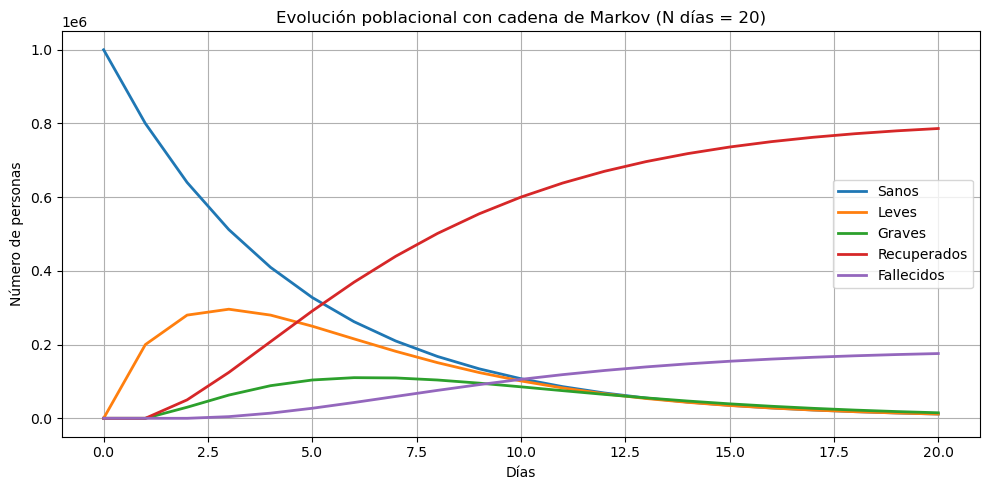

array([[ 11529],
       [ 11492],
       [ 14954],
       [786317],
       [175705]])

In [9]:
# Simulación de 20 días
vector_poblacion(20)

<p>
Después de ejecutar la simulación durante 20 días, utilizando la matriz de transición definida en el modelo epidemiológico, se obtuvo la evolución esperada de la población en cada uno de los cinco estados considerados: sanos, enfermos leves, enfermos graves, recuperados y fallecidos.
    
Al finalizar la simulación, los resultados muestran varios patrones característicos del comportamiento de la enfermedad bajo las probabilidades asumidas:

<ul>
    <li>
        La cantidad de personas sanas disminuye drásticamente, debido al alto nivel de contagio implícito en el modelo.
    </li>
    <li>
        Los casos leves y graves alcanzan un pico en los primeros días y luego disminuyen, lo que indica que con el tiempo la mayoría de los individuos transitan hacia los estados de recuperación o fallecimiento.
    </li>
    <li>
        La población de recuperados crece de forma sostenida, convirtiéndose en el grupo mayoritario al final del periodo simulado.
    </li>
    <li>
        El número de fallecidos también aumenta, reflejando el impacto de la probabilidad de progresión desde el estado grave hacia el fallecimiento.
    </li>
</ul>

La gráfica generada en la simulación permite visualizar estos cambios de manera clara, mostrando cómo la enfermedad presenta un auge inicial en los contagios, seguido de una estabilización donde predominan los individuos recuperados y fallecidos. Estos resultados corresponden a un escenario teórico que depende completamente de las probabilidades asumidas en el modelo, pero ilustran adecuadamente cómo una cadena de Markov puede utilizarse para estudiar la evolución de un proceso epidemiológico en el tiempo.
</p>